
## objective: To analyze sentiment of msgs / tweets for given data 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

For doing sentiment analysis on this dataset,Lets  drop the unnecessary colunns, keeping only *sentiment* and *text*.

In [2]:
import pandas as pd
data = pd.read_csv("")
# Keeping only the neccessary columns
data = data[['text','sentiment']]
data.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       13871 non-null  object
 1   sentiment  13871 non-null  object
dtypes: object(2)
memory usage: 216.9+ KB


First of all, splitting the dataset into a training and a testing set. The test set is the 10% of the original dataset. For this particular analysis I dropped the neutral tweets, as my goal was to only differentiate positive and negative tweets.

In [4]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.1)
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9662 entries, 8650 to 9794
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       9662 non-null   object
 1   sentiment  9662 non-null   object
dtypes: object(2)
memory usage: 226.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 6662 to 2353
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1388 non-null   object
 1   sentiment  1388 non-null   object
dtypes: object(2)
memory usage: 32.5+ KB


As a next step I separated the Positive and Negative tweets of the training set in order to easily visualize their contained words.  After that I cleaned the text from hashtags, mentions  and links. Now they were ready for a WordCloud visualization which shows only the most emphatic words of the Positive and Negative tweets.

Positive words


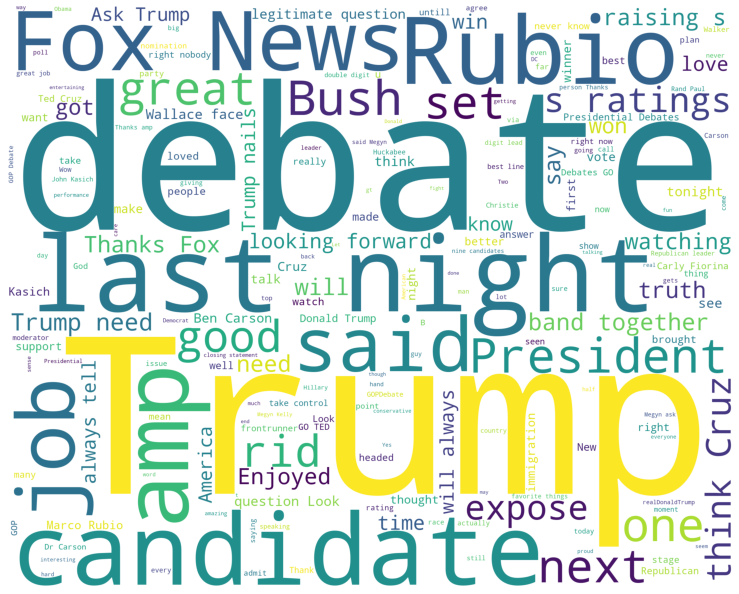

Negative words


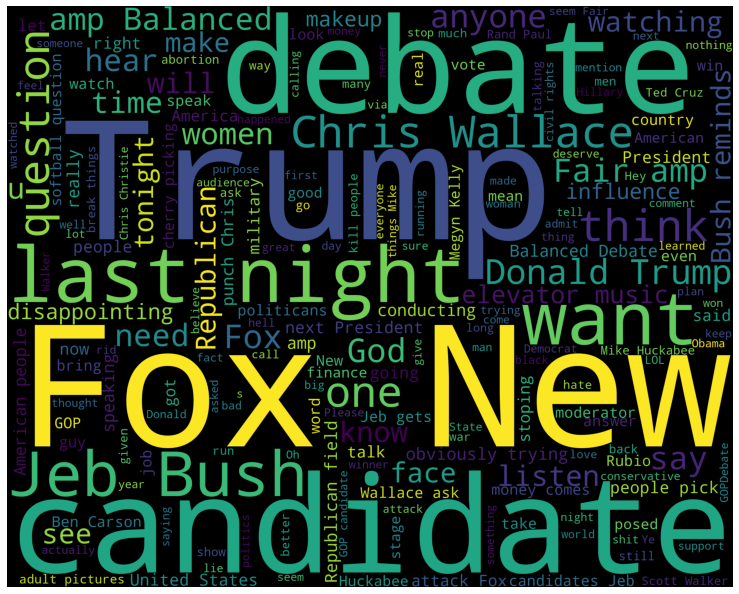

In [7]:
train_pos = train[train['sentiment'] == 'Positive']
train_pos = train_pos['text']

train_neg = train[train['sentiment'] == 'Negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = ' '.join([word for word in words.split()
                                if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000).generate(cleaned_word)
    
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [10]:
train_pos.head(2)

7597    @RealBenCarson Astounding job at the #GOPDebat...
1516    Why is everyone giving @megynkelly a hard time...
Name: text, dtype: object

In [11]:
train_neg.head(2)

6035    RT @oliviabcarter: "Destroying Isis in 90 Days...
3694    RT @jangajentaan: Trump: I have no time for po...
Name: text, dtype: object

Interesting to notice the following words and expressions in the positive word set:
 **truth**, **strong**, **legitimate**,  **together**, **love**, **job**

In my interpretation, people tend to believe that their ideal candidate is truthful, legitimate, above good and bad.


----------


At the same time, negative tweets contains words like:
**influence**, **news**, **elevator music**, **disappointing**, **softball**, **makeup**, **cherry picking**, **trying**

In my understanding people missed the decisively acting and considered the scolded candidates too soft and cherry picking.

After the vizualization, I removed the hashtags, mentions, links and stopwords from the training set.

**Stop Word:** Stop Words are words which do not contain important significance to be used in Search Queries. Usually these words are filtered out from search queries because they return vast amount of unnecessary information. ( the, for, this etc. )

In [12]:
tweets = []
stopwords_set = set(stopwords.words("english"))
print(stopwords_set)

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
                    if 'http' not in word
                    and not word.startswith('@')
                    and not word.startswith('#')
                    and word != 'RT']
    
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

{'about', 'why', 'from', "hadn't", 'didn', 'doesn', "wasn't", 'he', "mightn't", 'that', 'hers', 'same', 'them', 'does', 'if', 'between', 'shouldn', 'd', 'you', 'up', 'was', 'been', 'aren', "weren't", 'with', 'some', 'which', "it's", 'ain', 'again', 'myself', "shouldn't", 'i', "you'll", 'has', 'o', 'against', 'my', 'we', 'wouldn', 'those', 'his', 'than', 'had', 'its', 'all', "couldn't", 'mustn', 'm', 'hasn', 'and', 'don', 'll', "mustn't", 'by', 'it', 'then', 'having', "shan't", 'being', 'under', 'into', 'while', 'mightn', 'these', "you'd", 'am', 'ours', 'she', 'itself', 'y', 'is', 'not', 'yours', 're', 'isn', 't', 'can', 'a', "wouldn't", 'her', 'through', "doesn't", "should've", 'hadn', "that'll", 'there', 'or', 'during', 'herself', 'own', 'ma', 'off', 'on', "you're", 'shan', 'won', 'below', 'such', 'after', 'each', 'more', 's', 'they', 'himself', 'whom', 'other', 'an', 'their', 'for', 'too', "didn't", 'the', 'until', 'most', 'were', "haven't", 'themselves', "isn't", "aren't", "you've",

As a next step I extracted the so called features with nltk lib, first by measuring a frequent distribution and by selecting the resulting keys.

In [14]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

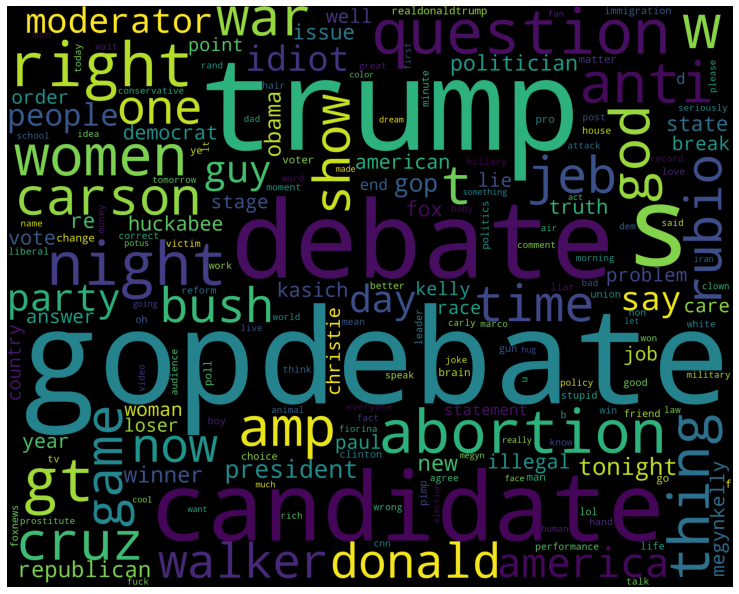

In [15]:
wordcloud_draw(w_features)

In [18]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
sentiment_classifier = nltk.NaiveBayesClassifier.train(training_set)

In [17]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))    

[Negative]: 859/823 
[Positive]: 230/88 


## Conclusion : Overall debate had more negative comments as comparedd to postive